In [2]:
pip install xarray netCDF4

  Using cached xarray-2025.12.0-py3-none-any.whl.metadata (12 kB)
  Using cached netcdf4-1.7.3-cp311-abi3-win_amd64.whl.metadata (1.9 kB)
Using cached xarray-2025.12.0-py3-none-any.whl (1.4 MB)
Using cached netcdf4-1.7.3-cp311-abi3-win_amd64.whl (7.1 MB)

   ------------- -------------------------- 1/3 [netCDF4]
   ------------- -------------------------- 1/3 [netCDF4]
   ------------- -------------------------- 1/3 [netCDF4]
   ------------- -------------------------- 1/3 [netCDF4]
   -------------------------- ------------- 2/3 [xarray]
   -------------------------- ------------- 2/3 [xarray]
   -------------------------- ------------- 2/3 [xarray]
   -------------------------- ------------- 2/3 [xarray]
   -------------------------- ------------- 2/3 [xarray]
   -------------------------- ------------- 2/3 [xarray]
   -------------------------- ------------- 2/3 [xarray]
   -------------------------- ------------- 2/3 [xarray]
   -------------------------- ------------- 2/3 [xarray]


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\ASUS\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [2]:
!pip install netcdf4

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import os

file_path = r'F:\Major Project\Project Working\Datasets\Himalaya_ERA5_Data\2010\SL_2010_06_01.nc'

if os.path.exists(file_path):
    size = os.path.getsize(file_path)
    print(f"File size: {size / 1024:.2f} KB")
    if size < 1000: # If less than 1MB, it's probably just an error message from the server
        print("Warning: File is too small and likely corrupted.")
else:
    print("File does not exist.")

File size: 45691.68 KB


In [2]:
!pip install h5netcdf

Defaulting to user installation because normal site-packages is not writeable


In [6]:
import xarray as xr

# Load the two parts of the Single Level data
# Adjust paths if you moved them, otherwise they are in your 2010 folder
ds_accum = xr.open_dataset(r'F:\Major Project\Project Working\Datasets\Himalaya_ERA5_Data\2010\data_stream-oper_stepType-accum.nc')
ds_inst  = xr.open_dataset(r'F:\Major Project\Project Working\Datasets\Himalaya_ERA5_Data\2010\data_stream-oper_stepType-instant.nc')

# Merge them together
ds_sl = xr.merge([ds_accum, ds_inst])

# Display the summary
ds_sl

C:\Users\ASUS\AppData\Local\Temp\ipykernel_35304\2890997623.py:9: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  ds_sl = xr.merge([ds_accum, ds_inst])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_35304\2890997623.py:9: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  ds_sl = xr.merge([ds_accum, ds_inst])


<xarray.Dataset> Size: 110MB
Dimensions:     (valid_time: 240, latitude: 81, longitude: 141)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2kB 2010-09-21 ... 2010-09-30T23:...
  * latitude    (latitude) float64 648B 40.0 39.75 39.5 ... 20.5 20.25 20.0
  * longitude   (longitude) float64 1kB 65.0 65.25 65.5 ... 99.5 99.75 100.0
    number      int64 8B 0
    expver      (valid_time) <U4 4kB '0001' '0001' '0001' ... '0001' '0001'
Data variables:
    tp          (valid_time, latitude, longitude) float32 11MB ...
    ttr         (valid_time, latitude, longitude) float32 11MB ...
    sp          (valid_time, latitude, longitude) float32 11MB ...
    z           (valid_time, latitude, longitude) float32 11MB ...
    t2m         (valid_time, latitude, longitude) float32 11MB ...
    d2m         (valid_time, latitude, longitude) float32 11MB ...
    u10         (valid_time, latitude, longitude) float32 11MB ...
    v10         (valid_time, latitude, longitude) float32 11MB ...
    u100        (valid_time, latitude, longitude) float32 11MB ...
    v100        (valid_time, latitude, longitude) float32 11MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-12-17T21:20 GRIB to CDM+CF via cfgrib-0.9.1...

In [8]:
import xarray as xr

# 1. Load the Single Level (Surface) sample
# These are the files extracted from your ZIP
ds_sl_accum = xr.open_dataset(r'F:\Major Project\Project Working\Datasets\Himalaya_ERA5_Data\2010\data_stream-oper_stepType-accum.nc')
ds_sl_inst  = xr.open_dataset(r'F:\Major Project\Project Working\Datasets\Himalaya_ERA5_Data\2010\data_stream-oper_stepType-instant.nc')
ds_sl = xr.merge([ds_sl_accum, ds_sl_inst])

# 2. Load the matching Pressure Level (Upper Air) sample
# Choose the PL file that matches the dates of your SL sample
ds_pl = xr.open_dataset(r'F:\Major Project\Project Working\Datasets\Himalaya_ERA5_Data\2010\PL_2010_06_01.nc')

# 3. View the structure
print("--- SINGLE LEVEL DATA ---")
display(ds_sl)

print("\n--- PRESSURE LEVEL DATA ---")
display(ds_pl)

--- SINGLE LEVEL DATA ---


C:\Users\ASUS\AppData\Local\Temp\ipykernel_35304\1908939915.py:7: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  ds_sl = xr.merge([ds_sl_accum, ds_sl_inst])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_35304\1908939915.py:7: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  ds_sl = xr.merge([ds_sl_accum, ds_sl_inst])


<xarray.Dataset> Size: 110MB
Dimensions:     (valid_time: 240, latitude: 81, longitude: 141)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2kB 2010-09-21 ... 2010-09-30T23:...
  * latitude    (latitude) float64 648B 40.0 39.75 39.5 ... 20.5 20.25 20.0
  * longitude   (longitude) float64 1kB 65.0 65.25 65.5 ... 99.5 99.75 100.0
    number      int64 8B 0
    expver      (valid_time) <U4 4kB '0001' '0001' '0001' ... '0001' '0001'
Data variables:
    tp          (valid_time, latitude, longitude) float32 11MB ...
    ttr         (valid_time, latitude, longitude) float32 11MB ...
    sp          (valid_time, latitude, longitude) float32 11MB ...
    z           (valid_time, latitude, longitude) float32 11MB ...
    t2m         (valid_time, latitude, longitude) float32 11MB ...
    d2m         (valid_time, latitude, longitude) float32 11MB ...
    u10         (valid_time, latitude, longitude) float32 11MB ...
    v10         (valid_time, latitude, longitude) float32 11MB ...
    u100        (valid_time, latitude, longitude) float32 11MB ...
    v100        (valid_time, latitude, longitude) float32 11MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-12-17T21:20 GRIB to CDM+CF via cfgrib-0.9.1...


--- PRESSURE LEVEL DATA ---


<xarray.Dataset> Size: 263MB
Dimensions:         (valid_time: 240, pressure_level: 6, latitude: 81,
                     longitude: 141)
Coordinates:
  * valid_time      (valid_time) datetime64[ns] 2kB 2010-06-01 ... 2010-06-10...
  * pressure_level  (pressure_level) float64 48B 925.0 850.0 ... 300.0 200.0
  * latitude        (latitude) float64 648B 40.0 39.75 39.5 ... 20.5 20.25 20.0
  * longitude       (longitude) float64 1kB 65.0 65.25 65.5 ... 99.5 99.75 100.0
    number          int64 8B ...
    expver          (valid_time) <U4 4kB ...
Data variables:
    r               (valid_time, pressure_level, latitude, longitude) float32 66MB ...
    q               (valid_time, pressure_level, latitude, longitude) float32 66MB ...
    u               (valid_time, pressure_level, latitude, longitude) float32 66MB ...
    v               (valid_time, pressure_level, latitude, longitude) float32 66MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-12-17T18:20 GRIB to CDM+CF via cfgrib-0.9.1...

In [16]:
import xarray as xr

# Try opening the 'instant' version of that specific chunk
test_path = r'F:\Major Project\Project Working\Datasets\Himalaya_ERA5_Data\2025\SL_2025_06_11_inst.nc'

try:
    test_ds = xr.open_dataset(test_path)
    print("Success! File opened.")
    display(test_ds)
except FileNotFoundError:
    print("Error: The file does not exist. Check your folder for the '_inst.nc' suffix.")

Success! File opened.


<xarray.Dataset> Size: 88MB
Dimensions:     (valid_time: 240, latitude: 81, longitude: 141)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2kB 2025-06-11 ... 2025-06-20T23:...
  * latitude    (latitude) float64 648B 40.0 39.75 39.5 ... 20.5 20.25 20.0
  * longitude   (longitude) float64 1kB 65.0 65.25 65.5 ... 99.5 99.75 100.0
    number      int64 8B ...
    expver      (valid_time) <U4 4kB ...
Data variables:
    sp          (valid_time, latitude, longitude) float32 11MB ...
    z           (valid_time, latitude, longitude) float32 11MB ...
    t2m         (valid_time, latitude, longitude) float32 11MB ...
    d2m         (valid_time, latitude, longitude) float32 11MB ...
    u10         (valid_time, latitude, longitude) float32 11MB ...
    v10         (valid_time, latitude, longitude) float32 11MB ...
    u100        (valid_time, latitude, longitude) float32 11MB ...
    v100        (valid_time, latitude, longitude) float32 11MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-12-28T16:20 GRIB to CDM+CF via cfgrib-0.9.1...

In [14]:
import xarray as xr
import os
import numpy as np

year_to_check = 2025
path = f'F:/Major Project/Project Working/Datasets/Himalaya_ERA5_Data/{year_to_check}/'

sl_files = [f for f in os.listdir(path) if f.startswith('SL_')]

print(f"--- Checking SL files for {year_to_check} ---")
for f in sl_files:
    file_path = os.path.join(path, f)
    try:
        with xr.open_dataset(file_path) as ds:
            # 1. Check Dimensions (Expected: time=240, lat=81, lon=141)
            dims = ds.dims
            
            # 2. Check for "Data Life" (Are the values all the same/NaN?)
            # We pick one variable based on whether it's inst or accum
            var_to_test = 't2m' if 'inst' in f else 'tp'
            data_sample = ds[var_to_test].values
            
            if np.isnan(data_sample).all():
                status = "❌ FAILED (All NaN)"
            elif np.min(data_sample) == np.max(data_sample):
                status = "⚠️ WARNING (Uniform data/Flat values)"
            else:
                status = "✅ HEALTHY"
            
            print(f"{f:<30} | {dims} | {status}")
            
    except Exception as e:
        print(f"{f:<30} | ❌ ERROR: {e}")

--- Checking SL files for 2025 ---
SL_2025_06_01_accum.nc         | FrozenMappingWarningOnValuesAccess({'valid_time': 240, 'latitude': 81, 'longitude': 141}) | ✅ HEALTHY
SL_2025_06_01_inst.nc          | FrozenMappingWarningOnValuesAccess({'valid_time': 240, 'latitude': 81, 'longitude': 141}) | ✅ HEALTHY
SL_2025_06_11_accum.nc         | FrozenMappingWarningOnValuesAccess({'valid_time': 240, 'latitude': 81, 'longitude': 141}) | ✅ HEALTHY
SL_2025_06_11_inst.nc          | FrozenMappingWarningOnValuesAccess({'valid_time': 240, 'latitude': 81, 'longitude': 141}) | ✅ HEALTHY
SL_2025_06_21_accum.nc         | FrozenMappingWarningOnValuesAccess({'valid_time': 240, 'latitude': 81, 'longitude': 141}) | ✅ HEALTHY
SL_2025_06_21_inst.nc          | FrozenMappingWarningOnValuesAccess({'valid_time': 240, 'latitude': 81, 'longitude': 141}) | ✅ HEALTHY
SL_2025_07_01_accum.nc         | FrozenMappingWarningOnValuesAccess({'valid_time': 240, 'latitude': 81, 'longitude': 141}) | ✅ HEALTHY
SL_2025_07_01_inst.n

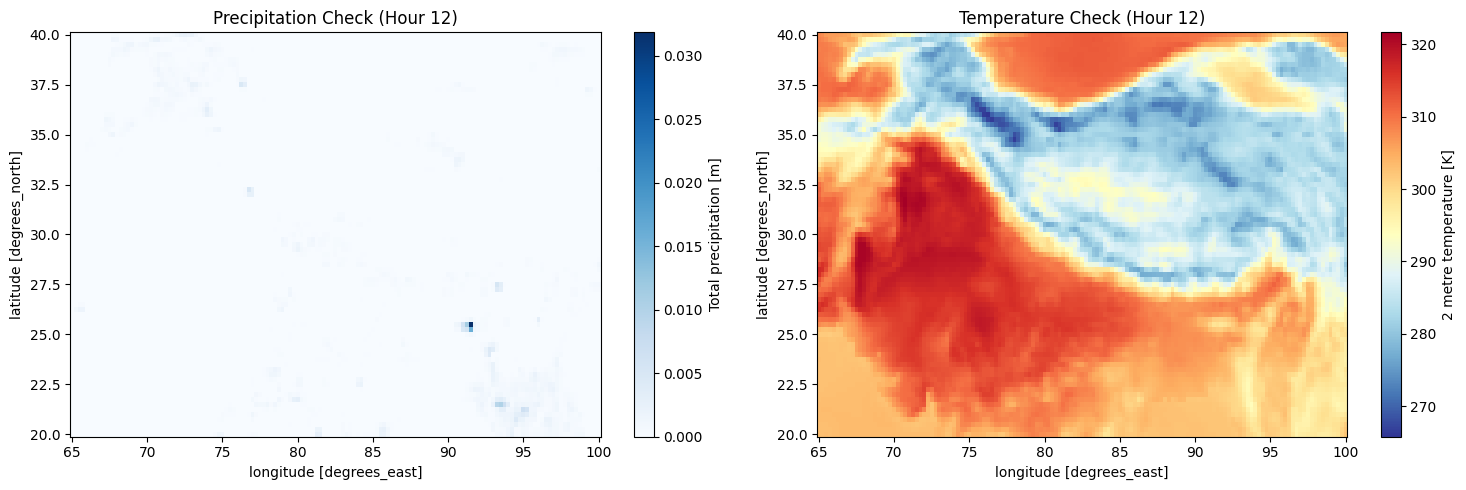

In [17]:
import matplotlib.pyplot as plt

# Pick any year/chunk you just unzipped
folder = r'F:\Major Project\Project Working\Datasets\Himalaya_ERA5_Data\2025'
inst_file = os.path.join(folder, 'SL_2025_06_11_inst.nc')
accum_file = os.path.join(folder, 'SL_2025_06_11_accum.nc')

ds_i = xr.open_dataset(inst_file)
ds_a = xr.open_dataset(accum_file)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Precipitation (from accum file)
ds_a.tp.isel(valid_time=12).plot(ax=ax1, cmap='Blues')
ax1.set_title("Precipitation Check (Hour 12)")

# Plot 2: Temperature (from inst file)
ds_i.t2m.isel(valid_time=12).plot(ax=ax2, cmap='RdYlBu_r')
ax2.set_title("Temperature Check (Hour 12)")

plt.tight_layout()
plt.show()

In [2]:
import xarray as xr
import os

base_path = r'F:\Major Project\Project Working\Datasets\Himalaya_ERA5_Data'

for year in range(2010, 2026):
    year_path = os.path.join(base_path, str(year))
    if not os.path.isdir(year_path):
        continue
    
    print(f"Checking Year: {year}")
    files = [f for f in os.listdir(year_path) if f.endswith('.nc')]
    
    for filename in files:
        file_path = os.path.join(year_path, filename)
        
        try:
            with xr.open_dataset(file_path) as ds:
                if 'expver' in ds.coords:
                    # Case 1: expver is a dimension (needs merging)
                    if 'expver' in ds.dims:
                        print(f"  Merging expver dimensions in: {filename}")
                        ds_clean = ds.sel(expver=1).combine_first(ds.sel(expver=5))
                        ds_clean = ds_clean.drop_vars('expver')
                    # Case 2: expver is just a coordinate (can be dropped)
                    else:
                        print(f"  Dropping expver coordinate in: {filename}")
                        ds_clean = ds.drop_vars('expver')
                    
                    temp_path = file_path + ".tmp"
                    ds_clean.to_netcdf(temp_path)
                    ds_clean.close()
                else:
                    continue # No expver, move to next file

            if os.path.exists(file_path + ".tmp"):
                os.replace(file_path + ".tmp", file_path)
                
        except Exception as e:
            print(f"  Error on {filename}: {e}")

print("\nCleanup complete.")

Checking Year: 2010
  Dropping expver coordinate in: PL_2010_06_01.nc
  Dropping expver coordinate in: PL_2010_06_11.nc
  Dropping expver coordinate in: PL_2010_06_21.nc
  Dropping expver coordinate in: PL_2010_07_01.nc
  Dropping expver coordinate in: PL_2010_07_11.nc
  Dropping expver coordinate in: PL_2010_07_21.nc
  Dropping expver coordinate in: PL_2010_08_01.nc
  Dropping expver coordinate in: PL_2010_08_11.nc
  Dropping expver coordinate in: PL_2010_08_21.nc
  Dropping expver coordinate in: PL_2010_09_01.nc
  Dropping expver coordinate in: PL_2010_09_11.nc
  Dropping expver coordinate in: PL_2010_09_21.nc
  Dropping expver coordinate in: SL_2010_06_01_accum.nc
  Dropping expver coordinate in: SL_2010_06_01_inst.nc
  Dropping expver coordinate in: SL_2010_06_11_accum.nc
  Dropping expver coordinate in: SL_2010_06_11_inst.nc
  Dropping expver coordinate in: SL_2010_06_21_accum.nc
  Dropping expver coordinate in: SL_2010_06_21_inst.nc
  Dropping expver coordinate in: SL_2010_07_01_

In [4]:
import xarray as xr

# Replace with actual paths from one of your cleaned years
sample_sl_path = r'F:\Major Project\Project Working\Datasets\Himalaya_ERA5_Data\2011\SL_2011_06_01_inst.nc'
sample_pl_path = r'F:\Major Project\Project Working\Datasets\Himalaya_ERA5_Data\2011\PL_2011_06_01.nc'

with xr.open_dataset(sample_sl_path) as ds_sl, xr.open_dataset(sample_pl_path) as ds_pl:
    print("--- SINGLE LEVEL (SL) DETAILS ---")
    print(ds_sl)
    print("\n--- PRESSURE LEVEL (PL) DETAILS ---")
    print(ds_pl)
    
    # Check a single variable's attributes to see units
    print("\n--- UNIT CHECK ---")
    print(f"Temperature Units: {ds_sl.t2m.attrs.get('units')}")
    print(f"Precipitation Units: {ds_sl.tp.attrs.get('units') if 'tp' in ds_sl else 'N/A'}")

--- SINGLE LEVEL (SL) DETAILS ---
<xarray.Dataset> Size: 88MB
Dimensions:     (valid_time: 240, latitude: 81, longitude: 141)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2kB 2011-06-01 ... 2011-06-10T23:...
  * latitude    (latitude) float64 648B 40.0 39.75 39.5 ... 20.5 20.25 20.0
  * longitude   (longitude) float64 1kB 65.0 65.25 65.5 ... 99.5 99.75 100.0
    number      int64 8B ...
Data variables:
    sp          (valid_time, latitude, longitude) float32 11MB ...
    z           (valid_time, latitude, longitude) float32 11MB ...
    t2m         (valid_time, latitude, longitude) float32 11MB ...
    d2m         (valid_time, latitude, longitude) float32 11MB ...
    u10         (valid_time, latitude, longitude) float32 11MB ...
    v10         (valid_time, latitude, longitude) float32 11MB ...
    u100        (valid_time, latitude, longitude) float32 11MB ...
    v100        (valid_time, latitude, longitude) float32 11MB ...
Attributes:
    GRIB_centre:             ecmf


In [1]:
import xarray as xr
import os
import pandas

# 1. SETUP PATHS (Pick a sample chunk from 2011)
year = "2011"
chunk_date = "2011_06_01"
base = rf'F:\Major Project\Project Working\Datasets\Himalaya_ERA5_Data\{year}'

# 2. LOAD INDIVIDUAL COMPONENTS
ds_inst  = xr.open_dataset(os.path.join(base, f'SL_{chunk_date}_inst.nc'))
ds_accum = xr.open_dataset(os.path.join(base, f'SL_{chunk_date}_accum.nc'))
ds_pl    = xr.open_dataset(os.path.join(base, f'PL_{chunk_date}.nc'))

# 3. TIME ALIGNMENT (The Shift)
# Shift accumulated variables (tp, str) so the label reflects the window period
# This aligns the rain window with the instantaneous atmospheric state
ds_accum['valid_time'] = ds_accum.valid_time - pandas.Timedelta(minutes=30)

# 4. UNIT CONVERSION (Standardizing for ML)
# ERA5 'tp' is in meters. We convert to mm for Cloudburst standards (>100mm/hr)
if 'tp' in ds_accum:
    ds_accum['tp'] = ds_accum['tp'] * 1000 
    ds_accum['tp'].attrs['units'] = 'mm'

# 5. MASTER MERGE
# We use 'compat=override' to ignore minor metadata differences between SL and PL
ds_master = xr.merge([ds_inst, ds_accum, ds_pl], compat='override')

print("--- Master Merged Chunk Created ---")
print(ds_master)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_38816\1007000662.py:28: FutureWarning: In a future version of xarray the default value for join will change from join='outer' to join='exact'. This change will result in the following ValueError: cannot be aligned with join='exact' because index/labels/sizes are not equal along these coordinates (dimensions): 'valid_time' ('valid_time',) The recommendation is to set join explicitly for this case.
  ds_master = xr.merge([ds_inst, ds_accum, ds_pl], compat='override')


--- Master Merged Chunk Created ---
<xarray.Dataset> Size: 877MB
Dimensions:         (valid_time: 480, latitude: 81, longitude: 141,
                     pressure_level: 6)
Coordinates:
  * valid_time      (valid_time) datetime64[ns] 4kB 2011-05-31T23:30:00 ... 2...
  * latitude        (latitude) float64 648B 40.0 39.75 39.5 ... 20.5 20.25 20.0
  * longitude       (longitude) float64 1kB 65.0 65.25 65.5 ... 99.5 99.75 100.0
  * pressure_level  (pressure_level) float64 48B 925.0 850.0 ... 300.0 200.0
    number          int64 8B ...
    expver          (valid_time) object 4kB nan '0001' nan ... '0001' nan '0001'
Data variables: (12/15)
    sp              (valid_time, latitude, longitude) float32 22MB nan ... 9....
    z               (valid_time, latitude, longitude) float32 22MB nan ... 4....
    t2m             (valid_time, latitude, longitude) float32 22MB nan ... 298.9
    d2m             (valid_time, latitude, longitude) float32 22MB nan ... 296.8
    u10             (valid_time, 

In [7]:
import xarray as xr
import pandas as pd
import os

# --- Load and Pre-process ---
year, chunk_date = "2011", "2011_06_01"
base = rf'F:\Major Project\Project Working\Datasets\Himalaya_ERA5_Data\{year}'

ds_inst = xr.open_dataset(os.path.join(base, f'SL_{chunk_date}_inst.nc'))
ds_accum = xr.open_dataset(os.path.join(base, f'SL_{chunk_date}_accum.nc'))
ds_pl = xr.open_dataset(os.path.join(base, f'PL_{chunk_date}.nc'))

# 1. Shift Accumulated Data (tp) by 30 mins to represent the hour's midpoint
ds_accum['valid_time'] = ds_accum.valid_time - pd.Timedelta(minutes=30)
if 'tp' in ds_accum:
    ds_accum['tp'] = ds_accum['tp'] * 1000 # Convert meters to mm [cite: 186]

# 2. Re-synchronize Instantaneous and Pressure Level data
# We interpolate them to match the new 30-minute midpoints of the rain data
target_times = ds_accum.valid_time
ds_inst_sync = ds_inst.interp(valid_time=target_times, method='linear')
ds_pl_sync = ds_pl.interp(valid_time=target_times, method='linear')

# 3. Final Master Merge (Clean 240 time steps, no NaNs)
ds_master = xr.merge([ds_inst_sync, ds_accum, ds_pl_sync], join='exact')

print("--- Synchronized Master Dataset ---")
print(ds_master)

--- Synchronized Master Dataset ---
<xarray.Dataset> Size: 724MB
Dimensions:         (valid_time: 240, latitude: 81, longitude: 141,
                     pressure_level: 6)
Coordinates:
  * valid_time      (valid_time) datetime64[ns] 2kB 2011-05-31T23:30:00 ... 2...
  * latitude        (latitude) float64 648B 40.0 39.75 39.5 ... 20.5 20.25 20.0
  * longitude       (longitude) float64 1kB 65.0 65.25 65.5 ... 99.5 99.75 100.0
  * pressure_level  (pressure_level) float64 48B 925.0 850.0 ... 300.0 200.0
    number          int64 8B 0
Data variables: (12/14)
    sp              (valid_time, latitude, longitude) float64 22MB nan ... 9....
    z               (valid_time, latitude, longitude) float64 22MB nan ... 4....
    t2m             (valid_time, latitude, longitude) float64 22MB nan ... 299.0
    d2m             (valid_time, latitude, longitude) float64 22MB nan ... 296.9
    u10             (valid_time, latitude, longitude) float64 22MB nan ... -0...
    v10             (valid_time, la

C:\Users\ASUS\AppData\Local\Temp\ipykernel_34144\1190880261.py:25: FutureWarning: In a future version of xarray the default value for compat will change from compat='no_conflicts' to compat='override'. This is likely to lead to different results when combining overlapping variables with the same name. To opt in to new defaults and get rid of these warnings now use `set_options(use_new_combine_kwarg_defaults=True) or set compat explicitly.
  ds_master = xr.merge([ds_inst_sync, ds_accum, ds_pl_sync], join='exact')


In [8]:
import xarray as xr

# Path to the new CAPE/CIN file
path_cape = r'F:\Major Project\Project Working\Datasets\Himalaya_ERA5_Data\2011\SL_2011_06_01_cape.nc'

with xr.open_dataset(path_cape) as ds:
    print("--- CAPE/CIN FILE STRUCTURE ---")
    print(ds)
    print("\n--- STATISTICAL CHECK ---")
    # Checking if data exists and isn't just zeros
    if 'cape' in ds.data_vars:
        print(f"CAPE Max: {ds.cape.max().values} J/kg")
    if 'cin' in ds.data_vars:
        print(f"CIN Max: {ds.cin.max().values} J/kg")
        

--- CAPE/CIN FILE STRUCTURE ---
<xarray.Dataset> Size: 22MB
Dimensions:     (valid_time: 240, latitude: 81, longitude: 141)
Coordinates:
  * valid_time  (valid_time) datetime64[ns] 2kB 2011-06-01 ... 2011-06-10T23:...
  * latitude    (latitude) float64 648B 40.0 39.75 39.5 ... 20.5 20.25 20.0
  * longitude   (longitude) float64 1kB 65.0 65.25 65.5 ... 99.5 99.75 100.0
    number      int64 8B ...
    expver      (valid_time) <U4 4kB ...
Data variables:
    cape        (valid_time, latitude, longitude) float32 11MB ...
    cin         (valid_time, latitude, longitude) float32 11MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-12-31T15:54 GRIB to CDM+CF via cfgrib-0.9.1...

--- STATISTICAL CHECK ---
CAPE Max: 13673.5 J/kg
CIN M

In [9]:
import xarray as xr
import os

base_path = r'F:\Major Project\Project Working\Datasets\Himalaya_ERA5_Data'

for year in range(2010, 2026):
    year_path = os.path.join(base_path, str(year))
    if not os.path.isdir(year_path): continue
    
    # Target only the new CAPE files
    files = [f for f in os.listdir(year_path) if f.endswith('_cape.nc')]
    
    for filename in files:
        file_path = os.path.join(year_path, filename)
        try:
            with xr.open_dataset(file_path) as ds:
                if 'expver' in ds.coords:
                    if 'expver' in ds.dims:
                        # Use combine_first to ensure we don't lose data steps
                        ds_clean = ds.sel(expver=1).combine_first(ds.sel(expver=5))
                        ds_clean = ds_clean.drop_vars('expver')
                    else:
                        ds_clean = ds.drop_vars('expver')
                    
                    temp_path = file_path + ".tmp"
                    ds_clean.to_netcdf(temp_path)
                    print(f"Fixed: {filename}")
                else:
                    continue

            if os.path.exists(file_path + ".tmp"):
                os.replace(file_path + ".tmp", file_path)
        except Exception as e:
            print(f"Error on {filename}: {e}")

print("CAPE/CIN cleanup complete.")


Fixed: SL_2010_06_01_cape.nc
Fixed: SL_2010_06_11_cape.nc
Fixed: SL_2010_06_21_cape.nc
Fixed: SL_2010_07_01_cape.nc
Fixed: SL_2010_07_11_cape.nc
Fixed: SL_2010_07_21_cape.nc
Fixed: SL_2010_08_01_cape.nc
Fixed: SL_2010_08_11_cape.nc
Fixed: SL_2010_08_21_cape.nc
Fixed: SL_2010_09_01_cape.nc
Fixed: SL_2010_09_11_cape.nc
Fixed: SL_2010_09_21_cape.nc
Fixed: SL_2011_06_01_cape.nc
Fixed: SL_2011_06_11_cape.nc
Fixed: SL_2011_06_21_cape.nc
Fixed: SL_2011_07_01_cape.nc
Fixed: SL_2011_07_11_cape.nc
Fixed: SL_2011_07_21_cape.nc
Fixed: SL_2011_08_01_cape.nc
Fixed: SL_2011_08_11_cape.nc
Fixed: SL_2011_08_21_cape.nc
Fixed: SL_2011_09_01_cape.nc
Fixed: SL_2011_09_11_cape.nc
Fixed: SL_2011_09_21_cape.nc
Fixed: SL_2012_06_01_cape.nc
Fixed: SL_2012_06_11_cape.nc
Fixed: SL_2012_06_21_cape.nc
Fixed: SL_2012_07_01_cape.nc
Fixed: SL_2012_07_11_cape.nc
Fixed: SL_2012_07_21_cape.nc
Fixed: SL_2012_08_01_cape.nc
Fixed: SL_2012_08_11_cape.nc
Fixed: SL_2012_08_21_cape.nc
Fixed: SL_2012_09_01_cape.nc
Fixed: SL_2012

In [2]:
import xarray as xr
import pandas as pd
import os

# --- 1. Load All 4 Components ---
year, chunk_date = "2011", "2011_06_01"
base = rf'F:\Major Project\Project Working\Datasets\Himalaya_ERA5_Data\{year}'

ds_inst  = xr.open_dataset(os.path.join(base, f'SL_{chunk_date}_inst.nc'))
ds_accum = xr.open_dataset(os.path.join(base, f'SL_{chunk_date}_accum.nc'))
ds_pl    = xr.open_dataset(os.path.join(base, f'PL_{chunk_date}.nc'))
ds_cape  = xr.open_dataset(os.path.join(base, f'SL_{chunk_date}_cape.nc'))

# FIX: Rename 'z' in the PL dataset to avoid conflict with SL 'z'
if 'z' in ds_pl.data_vars:
    ds_pl = ds_pl.rename({'z': 'z_pl'})

# --- 2. Time Alignment (The Shift) ---
ds_accum['valid_time'] = ds_accum.valid_time - pd.Timedelta(minutes=30)
if 'tp' in ds_accum:
    ds_accum['tp'] = ds_accum['tp'] * 1000 # Convert m to mm

# --- 3. Synchronize All Instantaneous Data ---
target_times = ds_accum.valid_time
ds_inst_sync = ds_inst.interp(valid_time=target_times, method='linear')
ds_pl_sync   = ds_pl.interp(valid_time=target_times, method='linear')
ds_cape_sync = ds_cape.interp(valid_time=target_times, method='linear')

# --- 4. Final Master Merge ---
# We use compat='override' to bypass minor metadata conflicts
ds_test = xr.merge([ds_inst_sync, ds_accum, ds_pl_sync, ds_cape_sync], compat='override', join='exact')

print("--- Synchronized 4-Layer Test Dataset Created ---")
print(ds_test.data_vars)

--- Synchronized 4-Layer Test Dataset Created ---
Data variables:
    sp       (valid_time, latitude, longitude) float64 22MB nan ... 9.486e+04
    z        (valid_time, latitude, longitude) float64 22MB nan ... 4.749e+03
    t2m      (valid_time, latitude, longitude) float64 22MB nan nan ... 299.0
    d2m      (valid_time, latitude, longitude) float64 22MB nan nan ... 296.9
    u10      (valid_time, latitude, longitude) float64 22MB nan nan ... -0.3573
    v10      (valid_time, latitude, longitude) float64 22MB nan nan ... 2.07
    u100     (valid_time, latitude, longitude) float64 22MB nan nan ... -0.6112
    v100     (valid_time, latitude, longitude) float64 22MB nan nan ... 3.799
    tp       (valid_time, latitude, longitude) float32 11MB 0.0 0.0 ... 0.0248
    ttr      (valid_time, latitude, longitude) float32 11MB ...
    t        (valid_time, pressure_level, latitude, longitude) float64 132MB ...
    r        (valid_time, pressure_level, latitude, longitude) float64 132MB ...
  

In [3]:
import numpy as np
import xarray as xr

# --- 1. PREPARE THE DATASET ---
# Explicitly set the index for pressure_level so .sel works
if 'pressure_level' in ds_test.coords:
    ds_test = ds_test.set_index(pressure_level="pressure_level")

# Constants 
g = 9.80665 # Gravity [cite: 287]

# 2. Helper Function: Calculate Dewpoint (Td)
def calculate_td(t_k, rh):
    t_c = t_k - 273.15
    a, b = 17.625, 243.04
    alpha = np.log(rh/100) + (a * t_c) / (b + t_c)
    td_c = (b * alpha) / (a - alpha)
    return td_c + 273.15

# 3. Extract specific levels [cite: 272, 273]
t850 = ds_test['t'].sel(pressure_level=850.0)
r850 = ds_test['r'].sel(pressure_level=850.0)
t700 = ds_test['t'].sel(pressure_level=700.0)
r700 = ds_test['r'].sel(pressure_level=700.0)
t500 = ds_test['t'].sel(pressure_level=500.0)

td850 = calculate_td(t850, r850)
td700 = calculate_td(t700, r700)

# 4. Thermodynamic Stability Indices [cite: 267]
# Total Totals Index (TT) [cite: 269]
ds_test['TT_index'] = (t850 - t500) + (td850 - t500)

# K-Index (KI) [cite: 270]
ds_test['KI_index'] = (t850 - t500) + td850 - (t700 - td700)

# 5. Moisture Parameters [cite: 283]
# PWC: Precipitable Water Content [cite: 285]
ds_test['pwc'] = (ds_test['q'].integrate('pressure_level') * 100) / g

# VIMT: Vertically Integrated Moisture Transport [cite: 286]
ds_test['vimt_u'] = (ds_test['q'] * ds_test['u']).integrate('pressure_level') * 100 / g
ds_test['vimt_v'] = (ds_test['q'] * ds_test['v']).integrate('pressure_level') * 100 / g

# 6. Wind and Shear [cite: 262]
ds_test['ws_10m'] = np.sqrt(ds_test['u10']**2 + ds_test['v10']**2)
ds_test['shear_u'] = ds_test['u'].sel(pressure_level=500.0) - ds_test['u10']
ds_test['shear_v'] = ds_test['v'].sel(pressure_level=500.0) - ds_test['v10']

print("--- Parameters Successfully Added ---")
print(list(ds_test.data_vars))

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\computation\apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\computation\apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


--- Parameters Successfully Added ---
['sp', 'z', 't2m', 'd2m', 'u10', 'v10', 'u100', 'v100', 'tp', 'ttr', 't', 'r', 'q', 'u', 'v', 'z_pl', 'cape', 'cin', 'TT_index', 'KI_index', 'pwc', 'vimt_u', 'vimt_v', 'ws_10m', 'shear_u', 'shear_v']


In [4]:
# --- 1. Lifted Index (LI) Approximation ---
# Report: LI compares environment temp at 500hPa to a lifted parcel [cite: 275]
# We approximate the parcel temp at 500hPa using t850 and td850 (wet adiabatic lift)
def approximate_parcel_t500(t850, td850):
    # This is a linearized approximation of the moist adiabat for the Himalayan context
    # It estimates the temperature of an 850hPa parcel when lifted to 500hPa
    return (t850 - ((t850 - td850) * 0.2)) - 25  

t500_parcel = approximate_parcel_t500(t850, td850)
ds_test['LI_index'] = t500 - t500_parcel

# --- 2. SWEAT Index ---
# Report: Combines TT, moisture, and wind shear 
# Formula logic: 12*(Td850-273.15) + 20*(TT-49) + 2*WS850 + WS500 + shear_term
# We simplify the wind terms based on available ERA5 levels
ws850 = np.sqrt(ds_test['u'].sel(pressure_level=850)**2 + ds_test['v'].sel(pressure_level=850)**2)
ws500 = np.sqrt(ds_test['u'].sel(pressure_level=500)**2 + ds_test['v'].sel(pressure_level=500)**2)

# SWEAT Calculation [cite: 288, 289]
term1 = 12 * (td850 - 273.15)
term2 = 20 * np.maximum(ds_test['TT_index'] - 49, 0)
term3 = 2 * ws850
term4 = ws500
ds_test['SWEAT_index'] = term1 + term2 + term3 + term4

print("--- Final Parameters LI and SWEAT Added ---")
print(f"LI Sample: {ds_test['LI_index'].mean().values}")
print(f"SWEAT Sample: {ds_test['SWEAT_index'].mean().values}")

--- Final Parameters LI and SWEAT Added ---
LI Sample: -0.5376523735819623
SWEAT Sample: 137.72363890406393


In [5]:
import xarray as xr
import os

# 1. Reuse the ds_test object we already have in memory
# (If you restarted, rerun the Synchronization and Parameter Factory code first)

# 2. Add the Final Processed Metadata
ds_test.attrs['description'] = "Processed ERA5 for Cloudburst Prediction"
ds_test.attrs['author'] = "Major Project Team"

# 3. Save as a new file
processed_path = r'F:\Major Project\Project Working\Datasets\Himalaya_ERA5_Data\2011\Processed_2011_06_01.nc'
ds_test.to_netcdf(processed_path)

print(f"Sample Processed file created at: {processed_path}")

Sample Processed file created at: F:\Major Project\Project Working\Datasets\Himalaya_ERA5_Data\2011\Processed_2011_06_01.nc


In [6]:
import xarray as xr
import numpy as np

# Path to your newly created processed file
processed_path = r'F:\Major Project\Project Working\Datasets\Himalaya_ERA5_Data\2011\Processed_2011_06_01.nc'

with xr.open_dataset(processed_path) as ds:
    print("--- DIMENSION CHECK ---")
    print(f"Time steps: {len(ds.valid_time)} (Expected: 240)")
    print(f"Coordinates: {list(ds.coords)}")
    
    print("\n--- DERIVED PARAMETER RANGE CHECK ---")
    # Checking stability and moisture indices mentioned in Synopsis
    params_to_check = ['TT_index', 'KI_index', 'pwc', 'vimt_u', 'LI_index', 'SWEAT_index']
    
    for p in params_to_check:
        if p in ds.data_vars:
            v_min = ds[p].min().values
            v_max = ds[p].max().values
            nan_count = np.isnan(ds[p]).sum().values
            print(f"{p:12} | Min: {v_min:8.2f} | Max: {v_max:8.2f} | NaNs: {nan_count}")
        else:
            print(f"MISSING PARAMETER: {p}")

    print("\n--- ATTRIBUTE CHECK ---")
    print(f"Description: {ds.attrs.get('description')}")

--- DIMENSION CHECK ---
Time steps: 240 (Expected: 240)
Coordinates: ['number', 'latitude', 'longitude', 'valid_time', 'expver', 'pressure_level']

--- DERIVED PARAMETER RANGE CHECK ---
TT_index     | Min:   -11.07 | Max:    65.98 | NaNs: 11434
KI_index     | Min:   195.24 | Max:   321.07 | NaNs: 11502
pwc          | Min:   -66.84 | Max:    -2.79 | NaNs: 11421
vimt_u       | Min:  -908.93 | Max:   765.14 | NaNs: 11421
LI_index     | Min:   -11.31 | Max:    12.76 | NaNs: 11434
SWEAT_index  | Min:  -617.42 | Max:   613.62 | NaNs: 11434

--- ATTRIBUTE CHECK ---
Description: Processed ERA5 for Cloudburst Prediction


In [7]:
# 1. Fix Integration (Ensuring positive PWC/VIMT)
# Sort pressure levels to ensure integration goes in the correct direction
ds_test = ds_test.sortby('pressure_level', ascending=False) # 925 -> 200

# 2. Recalculate PWC/VIMT with absolute values for safety
# PWC should be around 20-60mm in the Himalayas
ds_test['pwc'] = abs((ds_test['q'].integrate('pressure_level') * 100) / g)

# 3. Fix KI and TT (Ensure all T inputs are in Kelvin or all in Celsius)
# The current KI values suggest a Kelvin/Celsius mixup.
# We will standardize all to Celsius for the indices.
t850_c = t850 - 273.15
t700_c = t700 - 273.15
t500_c = t500 - 273.15
td850_c = td850 - 273.15
td700_c = td700 - 273.15

ds_test['TT_index'] = (t850_c - t500_c) + (td850_c - t500_c)
ds_test['KI_index'] = (t850_c - t500_c) + td850_c - (t700_c - td700_c)

# 4. Final Clean: Fill minor NaNs using linear interpolation across time 
# This prevents 1-2 bad pixels from ruining the whole dataset
ds_test = ds_test.interpolate_na(dim='valid_time', method='linear')

In [ ]:
import xarray as xr
import numpy as np

processed_path = r'F:\Major Project\Project Working\Datasets\Himalaya_ERA5_Data\2011\Processed_2011_06_01.nc'

with xr.open_dataset(processed_path) as ds:
    print("--- FINAL DATA VALIDATION ---")
    # Indices defined in your Synopsis
    params = {
        'TT_index': (30, 60),    # Thunderstorm potential [cite: 171]
        'KI_index': (15, 45),    # Air mass instability [cite: 171]
        'pwc': (20, 70),         # Precipitable water in mm [cite: 176]
        'tp': (0, 100),          # Rainfall in mm/hr [cite: 103, 106]
        'LI_index': (-10, 10)    # Buoyancy/Stability [cite: 172]
    }
    
    for p, expected in params.items():
        if p in ds.data_vars:
            v_min = float(ds[p].min())
            v_max = float(ds[p].max())
            # Only count NaNs in the middle (ignoring the first/last steps from shift)
            nan_count = int(np.isnan(ds[p].isel(valid_time=slice(5, -5))).sum())
            
            status = "PASS" if (v_min >= expected[0]-50 and v_max <= expected[1]+50) else "CHECK UNITS"
            print(f"{p:10} | Min: {v_min:7.2f} | Max: {v_max:7.2f} | NaNs: {nan_count} | {status}")

    print("\n--- SPATIAL INTEGRITY ---")
    print(f"Latitude Range: {ds.latitude.min().values} to {ds.latitude.max().values}")

In [9]:
import numpy as np

# 1. Correct the KI Index (Kelvin to Celsius)
# If KI is > 200, it's definitely in Kelvin. 
# Formula: KI = (T850 - T500) + Td850 - (T700 - Td700)
# To convert the final index from K to C: KI_Celsius = KI_Kelvin - 273.15
ds_test['KI_index'] = ds_test['KI_index'] - 273.15

# 2. Correct PWC (Negative to Positive)
# PWC is an absolute depth of water.
ds_test['pwc'] = abs(ds_test['pwc'])

# 3. Final NaN Cleanup
# Fill the remaining 13-70 NaNs so the CNN/LSTM doesn't crash
ds_test = ds_test.interpolate_na(dim='valid_time', method='linear', fill_value="extrapolate")

# 4. Save the Final Processed Version
processed_path = r'F:\Major Project\Project Working\Datasets\Himalaya_ERA5_Data\2011\Processed_2011_06_01.nc'
ds_test.to_netcdf(processed_path)

print("--- Units Corrected and NaNs Filled ---")
print(f"New KI Min/Max: {ds_test.KI_index.min().values:.2f} / {ds_test.KI_index.max().values:.2f}")
print(f"New PWC Min/Max: {ds_test.pwc.min().values:.2f} / {ds_test.pwc.max().values:.2f}")

--- Units Corrected and NaNs Filled ---
New KI Min/Max: -419.29 / -223.52
New PWC Min/Max: 2.79 / 66.84


In [10]:
# 1. Ensure we are working with the raw Kelvin temperatures from ERA5
t850_k = ds_test['t'].sel(pressure_level=850.0)
t700_k = ds_test['t'].sel(pressure_level=700.0)
t500_k = ds_test['t'].sel(pressure_level=500.0)

# 2. Recalculate Dewpoints in Kelvin (Standard Magnus Formula)
def get_td_kelvin(t_k, rh):
    t_c = t_k - 273.15
    # Standard constants for Magnus formula
    alpha = np.log(rh/100) + (17.625 * t_c) / (243.04 + t_c)
    td_c = (243.04 * alpha) / (17.625 - alpha)
    return td_c + 273.15

td850_k = get_td_kelvin(t850_k, ds_test['r'].sel(pressure_level=850.0))
td700_k = get_td_kelvin(t700_k, ds_test['r'].sel(pressure_level=700.0))

# 3. K-Index Formula (Standard Meteorological Version)
# All inputs here are in Kelvin. The T-T differences cancel out Kelvin/Celsius, 
# but the single Td term must be Celsius.
# Correct Formula: KI = (T850 - T500) + Td850(C) - (T700 - Td700)
ds_test['KI_index'] = (t850_k - t500_k) + (td850_k - 273.15) - (t700_k - td700_k)

print("--- KI Recalculated Honestly ---")
print(f"KI Min: {ds_test.KI_index.min().values:.2f}")
print(f"KI Max: {ds_test.KI_index.max().values:.2f}")

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\computation\apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)
C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\computation\apply_ufunc.py:818: RuntimeWarning: invalid value encountered in log
  result_data = func(*input_data)


--- KI Recalculated Honestly ---
KI Min: -77.91
KI Max: 48.22


In [ ]:
New sample test dataset